# Assignment 3
## Exercise 1
### Task 1.1
Original code:

In [53]:
def gauss_seidel(f):
    newf = f.copy()

    for i in range(1, newf.shape[0] - 1):
        for j in range(1, newf.shape[1] - 1):
            newf[i, j] = 0.25 * (
                newf[i, j + 1] + newf[i, j - 1] + newf[i + 1, j] + newf[i - 1, j]
            )

    return newf

In [64]:
import numpy as np

In [55]:
def gen_matrix(n):
    f = np.random.rand(n, n)
    f[0, :] = 0
    f[-1, :] = 0
    f[:, 0] = 0
    f[:, -1] = 0

    return f

In [56]:
import matplotlib.pyplot as plt
import timeit

In [57]:
gridSize = [5,10,20,50,75,100,150,200]
times = []
for N in gridSize:
    x = gen_matrix(N)

    start = timeit.default_timer()
    for i in range(1000):
        x = gauss_seidel(x)
    stop = timeit.default_timer()
    times.append(stop-start)

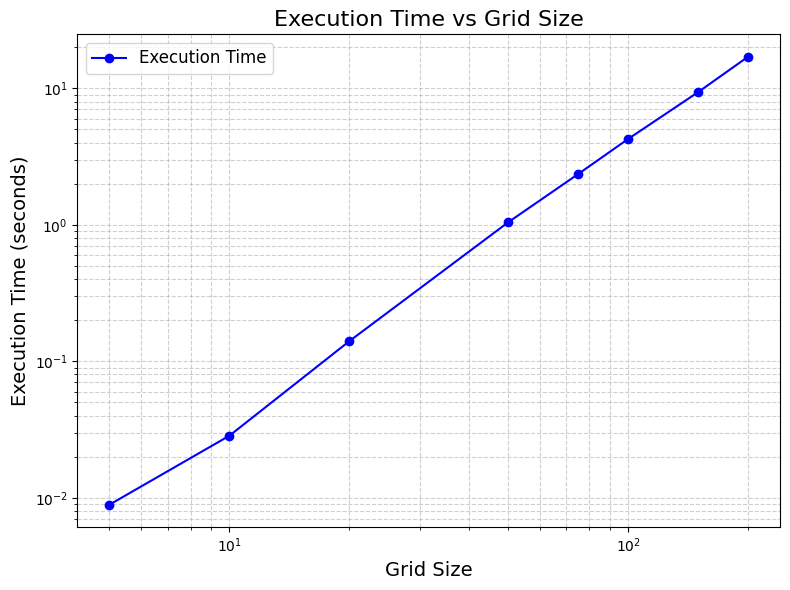

In [58]:
# Task 1.1 The solver is shown to be exponential
x = gridSize
y = times

plt.figure(figsize=(8, 6))
plt.plot(x, y, marker="o", linestyle="-", color="b", label="Execution Time")
plt.title("Execution Time vs Grid Size", fontsize=16)
plt.xlabel("Grid Size", fontsize=14)
plt.ylabel("Execution Time (seconds)", fontsize=14)
plt.xscale("log") 
plt.yscale("log") 
plt.grid(
    True, which="both", linestyle="--", alpha=0.6
) 
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()



### Task 1.2
Profile results:

In [59]:
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [60]:
x = gen_matrix(100)
%lprun -f gauss_seidel gauss_seidel(x)

Timer unit: 1e-09 s

Total time: 0.02554 s
File: /var/folders/l9/r5f8pkf159j52lh6xnjp3rd00000gn/T/ipykernel_45133/4032982141.py
Function: gauss_seidel at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def gauss_seidel(f):
     2         1      46000.0  46000.0      0.2      newf = f.copy()
     3                                           
     4        99      19000.0    191.9      0.1      for i in range(1, newf.shape[0] - 1):
     5      9702    1851000.0    190.8      7.2          for j in range(1, newf.shape[1] - 1):
     6     19208   14331000.0    746.1     56.1              newf[i, j] = 0.25 * (
     7      9604    9292000.0    967.5     36.4                  newf[i, j + 1] + newf[i, j - 1] + newf[i + 1, j] + newf[i - 1, j]
     8                                                       )
     9                                           
    10         1       1000.0   1000.0      0.0      return newf

### Task 1.3

In [69]:
%load_ext cython

SyntaxError: invalid syntax (2070493704.py, line 3)

In [62]:
%%cython --annotate
def gauss_seidel(f):
    newf = f.copy()

    for i in range(1, newf.shape[0] - 1):
        for j in range(1, newf.shape[1] - 1):
            newf[i, j] = 0.25 * (
                newf[i, j + 1] + newf[i, j - 1] + newf[i + 1, j] + newf[i - 1, j]
            )

    return newf

### Task 1.4

In [77]:
%%cython --annotate
cimport numpy as np

def gauss_seidel(np.ndarray[double, ndim=2] f):
    cdef int i, j
    cdef np.ndarray[double, ndim=2] newf = f.copy()
    
    cdef int iarr = newf.shape[0]
    cdef int jarr = newf.shape[1]

    for i in range(1, iarr - 1):
        for j in range(1, jarr - 1):
            newf[i, j] = 0.25 * (
                newf[i, j + 1] + newf[i, j - 1] + newf[i + 1, j] + newf[i - 1, j]
            )

    return newf

In [78]:
gridSize = [5, 10, 20, 50, 75, 100, 150, 200]
times = []
for N in gridSize:
    x = gen_matrix(N)

    start = timeit.default_timer()
    for i in range(1000):
        x = gauss_seidel(x)
    stop = timeit.default_timer()
    times.append(stop - start)

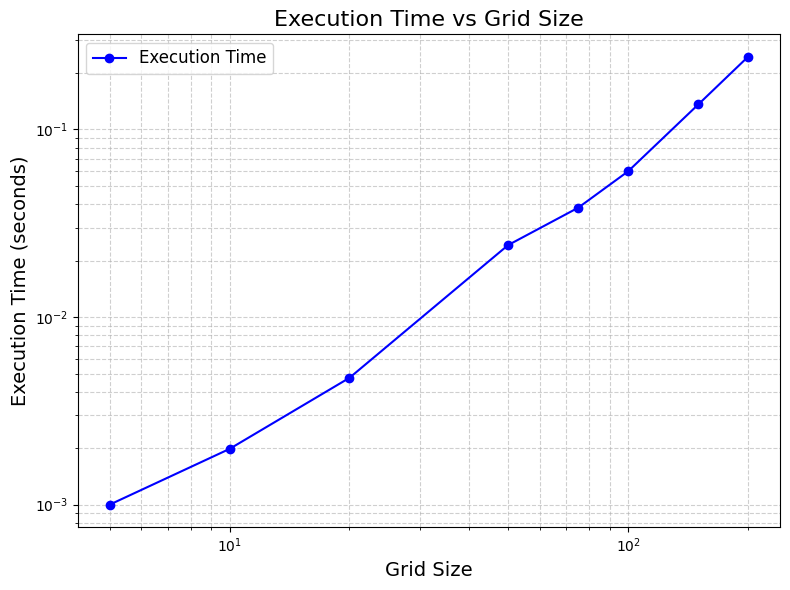

In [79]:
# Task 1.1 The solver is shown to be exponential
x = gridSize
y = times

plt.figure(figsize=(8, 6))
plt.plot(x, y, marker="o", linestyle="-", color="b", label="Execution Time")
plt.title("Execution Time vs Grid Size", fontsize=16)
plt.xlabel("Grid Size", fontsize=14)
plt.ylabel("Execution Time (seconds)", fontsize=14)
plt.xscale("log")
plt.yscale("log")
plt.grid(True, which="both", linestyle="--", alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()
